# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Tri Rambu Nugroho Prasetyo
- **Email:** m008b4ky4364@bangkit.academy
- **ID Dicoding:** tri_rambu_nugroho_prasetyo_4gSo

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan rata-rata Temperatur udara berdasarkan bulan di Aotizhongxin dari Tahun 2013 hingga Tahun 2017?
- Pada jam berapa tingkat kandungan Emisi CO tinggi dan Bagaimana pengaruh kandungan CO dengan PM2.5 dan PM10?

## Import Semua Packages/Library yang Digunakan

In [360]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import statsmodels.api as sm

## Data Wrangling

### Gathering Data

In [361]:
#Gathering Data
df = pd.read_csv("dashboard/PRSA_Data_Aotizhongxin_20130301-20170228.csv", delimiter=',')
df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin
35063,35064,2017,2,28,23,19.0,31.0,10.0,79.0,600.0,42.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Aotizhongxin


**Insight:**
- Melakukan pemanggilan terhadap dataset yang akan digunakan dengan library pandas, kemudian disimpan dalam variabel df untuk digunakan pada proses selanjutnya.

### Assessing Data

In [362]:
#imformasi data
print('Data Information: ')
df.info()

Data Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**
- Mengetahui infromasi singkat mengenai data-data yang ada pada dataset. Terdapat Nama kolom, jumlah data, tipe data dan memori yang digunakan

In [363]:
#memeriksa duplikasi data
duplicate_data = df.duplicated().sum()
print('Number of duplicated data: ', duplicate_data)

Number of duplicated data:  0


**Insight:**
- Memeriksa apabila terdapat duplikasi pada data.
- Dalam pemeriksaan ini didapati data tidak ada yang duplikat.

In [364]:
#memeriksa missing values
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

**Insight:**

Memeriksa apabila terdapat nilai kosong pada data. Data - data yang kosong diantaranya :

- PM2.5       925
- PM10        718
- SO2         935
- NO2        1023
- CO         1776
- O3         1719
- TEMP         20
- PRES         20
- DEWP         20
- RAIN         20
- wd           81
- WSPM         14

In [365]:
#memeriksa Outliers
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    MIN = Q1 - 1.5*IQR
    MAX = Q3 + 1.5*IQR
    outliers = data[(data<MIN) | (data>MAX)].count()
    return outliers
    

variabels = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for i in variabels:
    print('Number of outliers in ', i, ' : ', find_outliers(df[i]))


Number of outliers in  PM2.5  :  1624
Number of outliers in  PM10  :  1080
Number of outliers in  SO2  :  3054
Number of outliers in  NO2  :  472
Number of outliers in  CO  :  2607
Number of outliers in  O3  :  1310
Number of outliers in  TEMP  :  0
Number of outliers in  PRES  :  0
Number of outliers in  DEWP  :  0
Number of outliers in  RAIN  :  1380
Number of outliers in  WSPM  :  1742


**Insight:**

Memeriksa apabila terdapat nilai outlier pada data. Data - data yang terdapat outlier diantaranya :

- PM2.5  :  1624
- PM10  :  1080
- in  SO2  :  3054
- NO2  :  472
- CO  :  2607
- O3  :  1310
- RAIN  :  1380
- WSPM  :  1742

In [366]:
#deskripsi data
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
Melakukan proses penilaian pada data untuk mengetahui lebih mendalam mengenai data yang digunakan, baik terkait kekurangan atau kelebihannya.
- Mendapatkan Informasi detail data.
- Mengetahui data yang ganda (duplikat).
- Mengetahui nilai pada data yang kosong.
- Mengetahui banyak outlier pada data
- Dapat mengetahui kegiatan yang harus dilakukan untuk proses pembersihan data.

### Cleaning Data

In [367]:
#Mengatasi Missing Values
def missing_values_handling(data):
    for i in data.columns:
        if data[i].dtype in ['float64', 'int64']:
            data[i] = data[i].fillna(data[i].mean())
        else:
            data[i] = data[i].fillna(data[i].mode()[0])
    return data


missing_values_handling(df)
df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight:**
- Dapat mengatasi nilai data yang kosong atau hilang dengan cara Imputasi. Langkah ini dipilih untuk menghindari informasi penting pada data dikarenakan banyaknya jumlah data yang kosong.

In [368]:
#Mengatasi Outliers
def outlier_handling(data):
    data = pd.to_numeric(data, errors='coerce')
    
    while True:
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        MIN, MAX = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        
        outlier = (data < MIN) | (data > MAX)
        data = data.mask(outlier, data.median())
        
        outliers_count = outlier.sum()
        
        if outliers_count == 0:
            break
    
    return data


variabels = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for i in variabels:
    df[i] = outlier_handling(df[i])


**Insight:**
- Dapat mengatasi nilai-nilai outliers dengan cara imputasi.
- Mengatasi nilai outlier tanpa menghilangkan data dan informasi penting.

## Exploratory Data Analysis (EDA)

### Explore Data Air Quality Dataset

In [369]:
df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.0,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5221,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,59.572761,93.583250,7.566696,56.725390,886.914173,44.812216,13.584607,1011.846920,3.123062,0.0,NaN,1.370038,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,41.749243,64.983567,4.386308,32.219938,468.353726,37.277212,11.395845,10.401079,13.684991,0.0,NaN,0.699825,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.0,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,31.000000,500.000000,9.000000,3.100000,1003.300000,-8.100000,0.0,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,89.000000,9.000000,55.000000,900.000000,46.000000,14.500000,1011.400000,3.800000,0.0,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,82.773611,133.000000,9.000000,78.000000,1200.000000,66.000000,23.300000,1020.100000,15.600000,0.0,NaN,1.800000,NaN


**Insight:**
- Mendapatkan gambaran data secara luas dan menyeluruh.
- Detail data meliputi jumlah, nilai max dan nilai min, rata-rata, dll

In [370]:
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1)) 
df.groupby(['year', 'month'])['TEMP'].mean().unstack(level=0)

year,2013,2014,2015,2016,2017
month,,,,,
1,NaN,-0.138306,-0.682951,-4.550000,-0.930223
2,NaN,-0.097321,1.251316,1.398420,2.661533
3,6.053629,9.920430,8.439862,9.201882,NaN
4,12.260694,16.891528,15.630139,16.454722,NaN
5,21.374194,21.176075,21.455511,21.672849,NaN
6,23.386111,24.585972,24.537778,25.735833,NaN
7,26.877419,27.806317,26.397849,27.699462,NaN
8,26.744355,25.817070,26.435753,27.863306,NaN
9,20.077778,20.767222,20.600833,22.113653,NaN


**Insight:**
- Mengetahui data rata-rata temperatur pada setiap bulan dan disetiap tahun. 

In [371]:
avg_temp_of_month = df.groupby(['year', 'month'])['TEMP'].mean().reset_index()

avg_temp_of_month['month'] = avg_temp_of_month['month'].apply(lambda x: calendar. month_name[x])
avg_temp_of_month.rename(columns={
    "TEMP": "Average Temperature"
}, inplace=True)
avg_temp_of_month

,year,month,Average Temperature
0,2013,March,6.053629
1,2013,April,12.260694
2,2013,May,21.374194
3,2013,June,23.386111
4,2013,July,26.877419
5,2013,August,26.744355
6,2013,September,20.077778
7,2013,October,12.809812
8,2013,November,5.530972
9,2013,December,-0.161290


**Insight:**
- Mengetahui data rata-rata temperatur pada setiap bulan dan disetiap tahun. 

In [372]:
average_co = df.groupby('hour')['CO'].mean().reset_index()
pd.DataFrame(average_co)

,hour,CO
0,0,911.438278
1,1,907.449989
2,2,887.982464
3,3,892.302547
4,4,875.697164
5,5,876.120003
6,6,884.923525
7,7,904.345229
8,8,934.517188
9,9,957.606506


**Insight:**
- Mendapatkan nilai rata-rata tingkat emisi CO pada setiap jam

In [373]:
#Menghitung korelasi antara CO dan PM2.5, PM10

korelasi_co_pm25 = df['CO'].corr(df['PM2.5'])
korelasi_co_pm10 = df['CO'].corr(df['PM10'])
print(f'Korelasi antara CO dan PM2.5: {korelasi_co_pm25:.2f}')
print(f'Korelasi antara CO dan PM10: {korelasi_co_pm10:.2f}')


Korelasi antara CO dan PM2.5: 0.58
Korelasi antara CO dan PM10: 0.49


**Insight:**
- Mendapatkan nilai korelasi/hubungan emisi CO dengan ukuran partikel polusi udara.

In [374]:
#mencari nilai regresi antara CO dan PM2.5, PM10
# regresi co dan PM2.5
x25 = df['CO']
y25 = df['PM2.5']
x25 = sm.add_constant(x25)
pm25 = sm.OLS(y25, x25).fit()
print(pm25.summary())

# regresi co dan PM10
x10 = df['CO']
y10 = df['PM10']
x10 = sm.add_constant(x10)  
pm10 = sm.OLS(y10, x10).fit()
print(pm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                 1.742e+04
Date:                Sat, 05 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:45:56   Log-Likelihood:            -1.7353e+05
No. Observations:               35064   AIC:                         3.471e+05
Df Residuals:                   35062   BIC:                         3.471e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0204      0.390     35.927      0.0

**Insight:**
- Mendapatkan nilai korelasi/hubungan emisi CO dengan ukuran partikel polusi udara.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan rata-rata Temperatur udara berdasarkan bulan di Aotizhongxin dari Tahun 2013 hingga Tahun 2017?

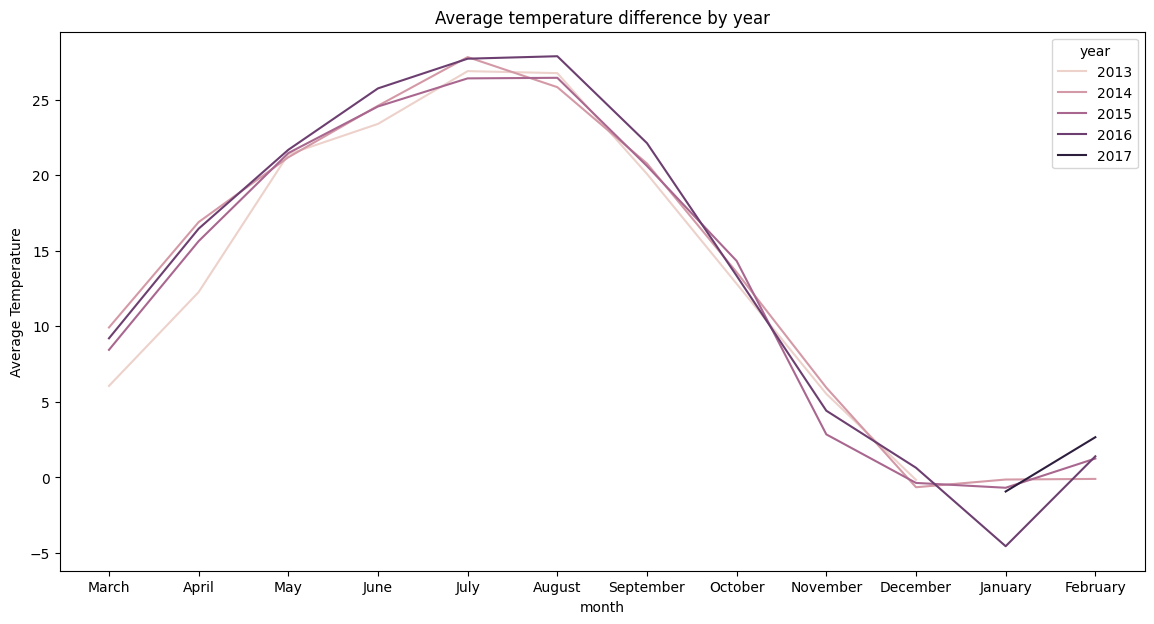

In [375]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_temp_of_month, x='month', y='Average Temperature', hue='year')
plt.title('Average temperature difference by year')
plt.show()

**Insight:**
- Mengetahui perbedaan rata-rata temperatur setiap bulan berdasarkan tahun

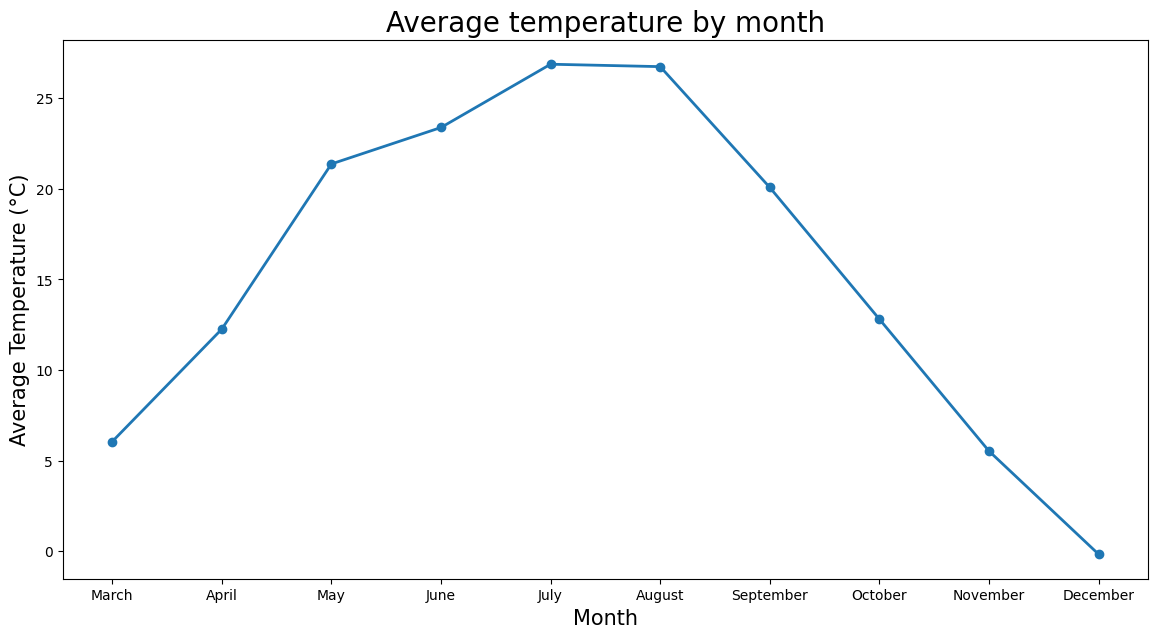

In [376]:
plt.figure(figsize=(14, 7))
avg_temp_of_month = df.groupby(['year', 'month'])['TEMP'].mean().reset_index()
avg_temp_of_month['month'] = avg_temp_of_month['month'].apply(lambda x: calendar. month_name[x])
avg_temp_of_month.rename(columns={
    "TEMP": "Average Temperature"
}, inplace=True)
for year in avg_temp_of_month['year'].unique():
    avg_temp_of_month = avg_temp_of_month[avg_temp_of_month['year']==year]
    plt.plot(
        avg_temp_of_month["month"],
        avg_temp_of_month["Average Temperature"],
        marker='o', 
        linewidth=2,
        label=year
    )
plt.title("Average temperature by month", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Average Temperature (°C)", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


**Insight:**
- Mengetahui rata-rata temperatur setiap bulan.

### Pertanyaan 2: Pada jam berapa tingkat kandungan Emisi CO tinggi dan Bagaimana pengaruh kandungan CO dengan PM2.5 dan PM10?

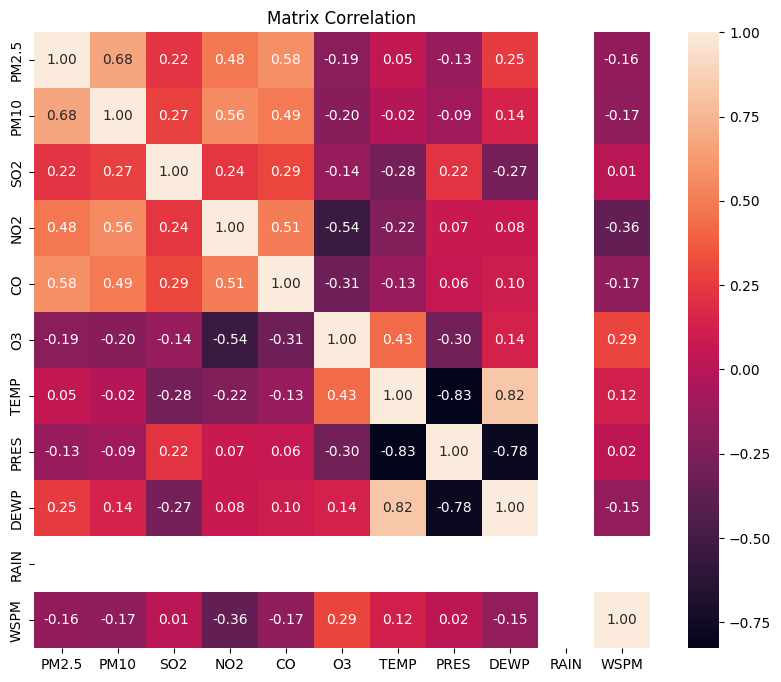

In [377]:
columns = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
corr_data = df[columns].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, fmt=".2f", square=True)
plt.title('Matrix Correlation')
plt.show()

**Insight:**
- Menampilkan secara visual hubungan atau korelasi antar variabel pada dataset polusi udara


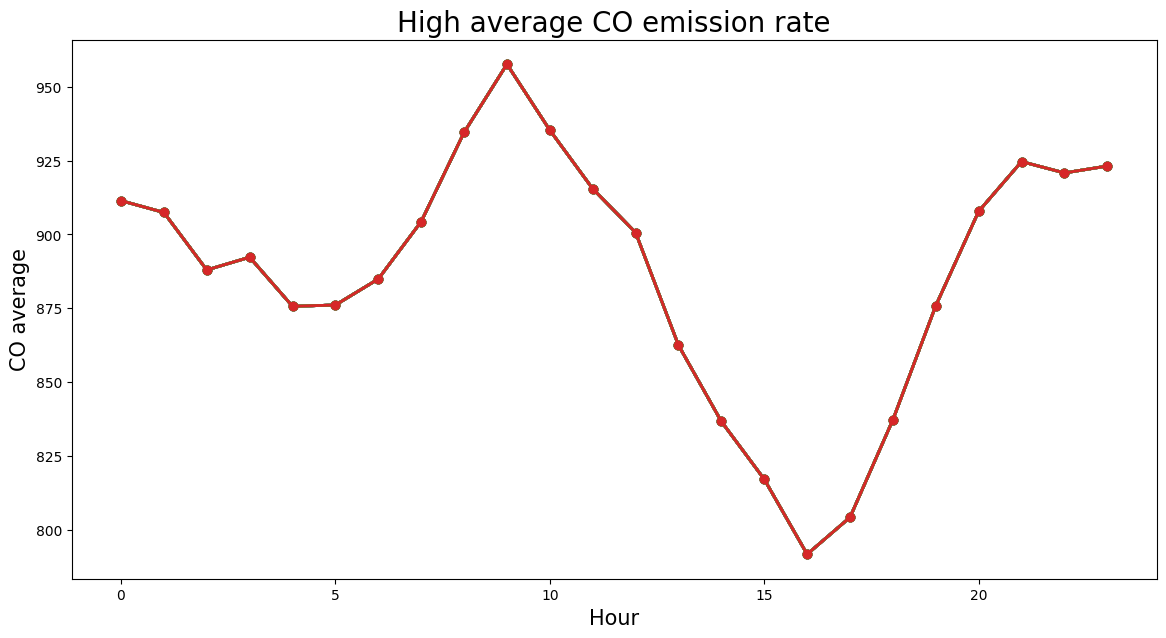

In [378]:
plt.figure(figsize=(14, 7))
average_co = df.groupby('hour')['CO'].mean().reset_index()
for year in average_co['hour'].unique():
    plt.plot(
        average_co["hour"],
        average_co["CO"],
        marker='o', 
        linewidth=2,
        label=year
    )
plt.title("High average CO emission rate", loc="center", fontsize=20)
plt.xlabel("Hour", fontsize=15)
plt.ylabel("CO average", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- Menampilkan secara Visual rata-rata kandungan emisi karbon monoksida pada jam tertentu.
- Titik tertinggi kandungan emisi CO pada pukul 9 dan terendah pada pukul 16

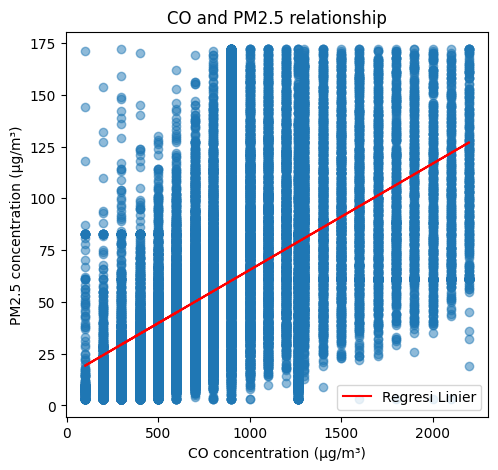

In [379]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['CO'], df['PM2.5'], alpha=0.5)
plt.plot(df['CO'], pm25.predict(x25), color='red', label='Regresi Linier')
plt.title('CO and PM2.5 relationship')
plt.xlabel('CO concentration (μg/m³)')
plt.ylabel('PM2.5 concentration (μg/m³)')
plt.legend()



**Insight:**
- Mengetahui korelasi emisi CO dengan PM2.5
- Melihat dengan jelas garis regresi emisi CO dan PM2.5


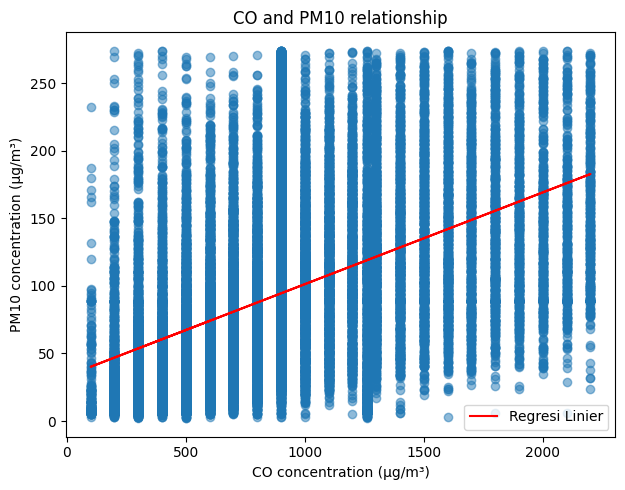

In [380]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.scatter(df['CO'], df['PM10'], alpha=0.5)
plt.plot(df['CO'], pm10.predict(x10), color='red', label='Regresi Linier')
plt.title('CO and PM10 relationship')
plt.xlabel('CO concentration (μg/m³)')
plt.ylabel('PM10 concentration (μg/m³)')
plt.legend()

plt.tight_layout()
plt.show()

**Insight:**
- Mengetahui korelasi emisi CO dengan PM10
- Melihat dengan jelas garis regresi emisi CO dan PM10

## Conclusion

##### Conclusion Pertanyaan 1 :
- Rata-Rata perubahan suhu pada setiap bulan di rentang tahun 2013 hingga 2017 relatif sama, hal ini dibuktikan dengan perbedaan atau gap pada grafik setiap tahun tidak terlalu jauh. temperatur mencapai titik tertingginya pada bulan Juli - Agustus dan Titik terendah pada bulan Desember - Januari.
##### Conclusion Pertanyaan 2 :
- Rata - rata titik tertinggi kandungan emisi CO pada pukul 9 dan terendah pada pukul 16. Kemudian meskipun tidak terlalu banyak perbedaannya, Kandungan emisi gas CO lebih berpengaruh pada polutan dengan ukuran 2.5 mikrometer. Oleh karena itu dengan ukurannya yang terlalu kecil dapat berpengaruh pada organ tubuh bagian dalam.